# (04) rebuttal fig: temp anneal

**Motivation**: <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
# sys.path.insert(0, os.path.join(git_dir, '_IterativeVAE'))
# sys.path.insert(0, '/home/hadi/Dropbox/chkpts/pvae-source-code')
from figures.fighelper import *
from vae.train_vae import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
device_idx = 1
device = f'cuda:{device_idx}'

In [3]:
fig_dir = pjoin(fig_base_dir, 'rebuttal_aug')
os.makedirs(fig_dir, exist_ok=True)
print(os.listdir(fig_dir))

kws_fig = {
    'transparent': True,
    'bbox_inches': 'tight',
    'dpi': 600,
}

['temp.pdf', 'logreg.pdf', 'dim.pdf', 'samples_hist.pdf']

## Anneal fig

In [4]:
n_iters = 1000000
kws = dict(
    n_iters=n_iters,
    portion=0.5,
    t0=1,
    t1=0.05,
)
schedule = {
    'lin': temp_anneal_linear(**kws),
    'exp': temp_anneal_exp(**kws),
}

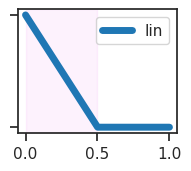

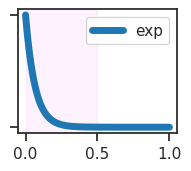

In [13]:
for k, v in schedule.items():
    fig, ax = create_figure(1, 1, (1.8, 1.6))
    ax.plot(np.linspace(0, 1, n_iters), v, lw=5, label=k)
    ax.set(
        xticks=(0, 0.5, 1.0),
        yticks=(max(v), min(v)),
        yticklabels=[],
    )
    plt.axvspan(0, 0.5, color='violet', alpha=0.1)
    ax.legend()
    
    plt.show()

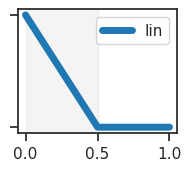

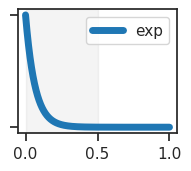

In [27]:
for k, v in schedule.items():
    fig, ax = create_figure(1, 1, (1.8, 1.6))
    ax.plot(np.linspace(0, 1, n_iters), v, lw=5, label=k)
    ax.set(
        xticks=(0, 0.5, 1.0),
        yticks=(max(v), min(v)),
        yticklabels=[],
    )
    plt.axvspan(0, 0.5, color='dimgrey', alpha=0.07)
    ax.legend()
    fig.savefig(pjoin(fig_dir, f"anneal_{k}.pdf"), **kws_fig)
    plt.show()

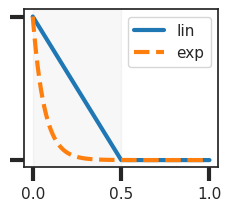

In [33]:
fig, ax = create_figure(1, 1, (2.2, 2.0))
for k, v in schedule.items():
    ax.plot(
        np.linspace(0, 1, n_iters),
        v,
        lw=3,
        ls='-' if k == 'lin' else '--',
        label=k,
    )
ax.set(
    xticks=(0, 0.5, 1.0),
    yticks=(max(v), min(v)),
    yticklabels=[],
)
plt.axvspan(0, 0.5, color='dimgrey', alpha=0.05)
ax.legend()
plt.tick_params(axis='both', which='both', length=10, width=3)
fig.savefig(pjoin(fig_dir, 'anneal.pdf'), **kws_fig)
plt.show()